In [1]:
import numpy as np
import pandas as pd
%matplotlib notebook

# 1.matplotlib  API 入门

In [5]:
import matplotlib.pyplot as plt

In [6]:
data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

<IPython.core.display.Javascript object>


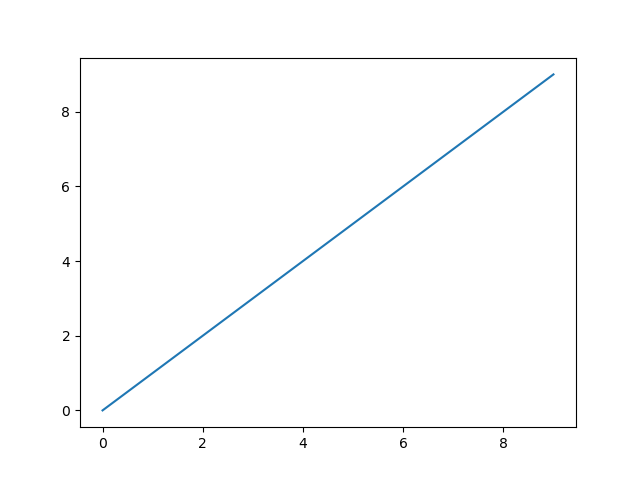

In [7]:
plt.plot(data)

# Figure 和Subplot

<IPython.core.display.Javascript object>


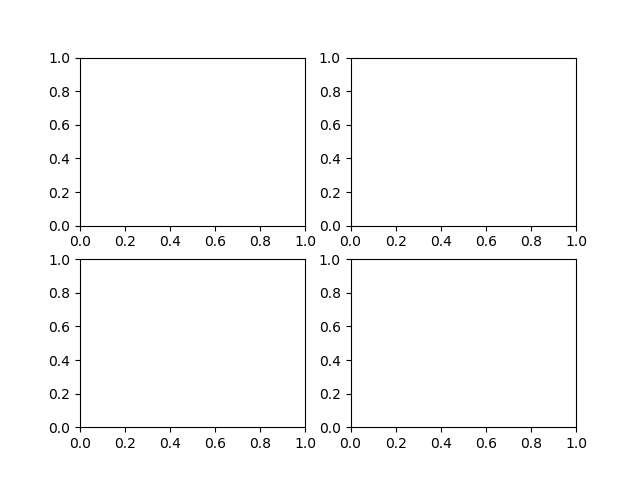

In [14]:
fig = plt.figure()   # plt.figure() 创建一个新的figure对象
ax1 = fig.add_subplot(2,2,1)     # 不能通过空figure绘图，用add_subplot创建一个或多个subplot：
ax2 = fig.add_subplot(2,2,2)    # （2,2,2） 表示 图像最多生成（2*2=4张图） 第三个2表示是生成的第二张图
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)       # 所有的绘图命令存在一个小窗里

如果这个时候执行一条绘图命令（如plt.plot（[1.5,3.5，-2,1.6]）），matplotlib就在最后一个用过subplot（如果没有则创建一个）上绘制，隐藏创建figure和subplot的过程。

<IPython.core.display.Javascript object>


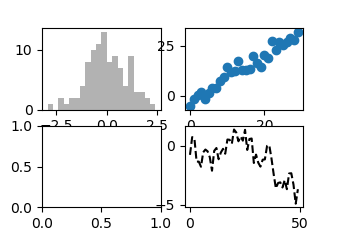

In [22]:
fig = plt.figure()   
ax1 = fig.add_subplot(2,2,1)     
ax2 = fig.add_subplot(2,2,2)    
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)    
plt.plot(np.random.randn(50).cumsum(),'k--')  # 随机生成50个数字，‘k- -’告诉matplotlib绘制黑色虚线图

由fig.add_subplot所返回的对象是AxesSubplot对象，可以直接调用他们的实例方法

In [23]:
ax1.hist(np.random.randn(100),bins = 20,color = 'k',alpha=0.3)
ax2.scatter(np.arange(30),np.arange(30)+3*np.random.randn(30))

matplotlib有一个更为方便的创建一个新的Figure方法：plt.subplots，并返回一个含有已创建的subplot对象的Numpy数组：

<IPython.core.display.Javascript object>


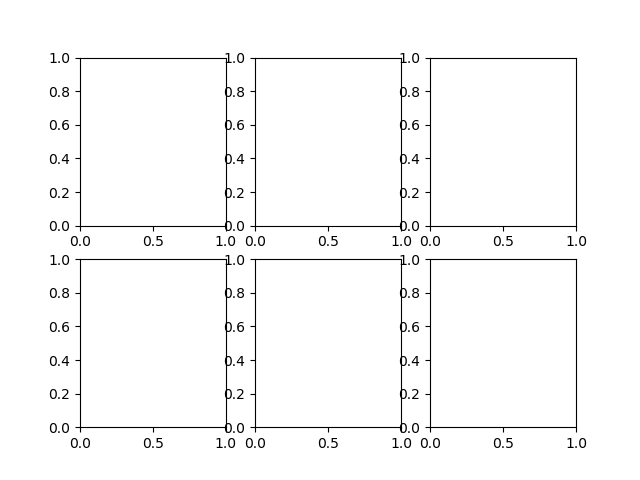

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001255E048>,
      dtype=object)

In [29]:
fig,axes = plt.subplots(2,3)
axes

# 调整subplot周围的间距 

<IPython.core.display.Javascript object>


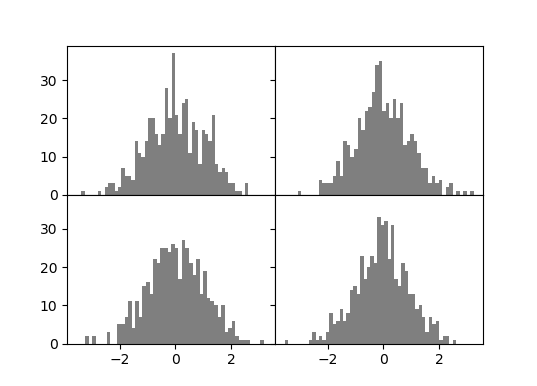

In [32]:
fig,axes = plt.subplots(2,2,sharex = True,sharey = True)  # 创建2*2个subplots ，
                                                       # 后两个参数表示所有的subplot使用相同的X、Y轴刻度
for i in range(2):
    for j in range(2):
        axes[i,j].hist(np.random.randn(500),bins = 50,color = 'k',alpha = 0.5)
plt.subplots_adjust(wspace=0,hspace=0)        # wspace 、hspace 控制宽度和高度百分比，subplot之间的间距

# 颜色、标记和线型

matplotlib的plot函数接受一组X和Y坐标，还可以接受一个表示颜色和线型的字符串缩写。                       如根据x和y绘制绿色虚线： ax.plot(x,y,'g--')  等价于 ：ax.plot(x,y,linestyle='--',color='g')

<IPython.core.display.Javascript object>


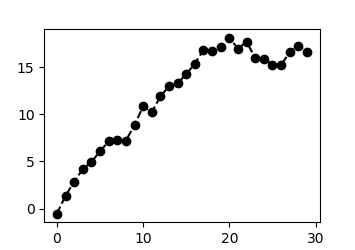

In [7]:
from numpy.random import randn
plt.plot(randn(30).cumsum(),'ko--')

更明确的形式：

<IPython.core.display.Javascript object>


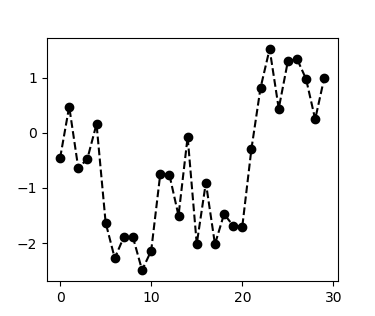

In [9]:
plt.plot(randn(30).cumsum(),color = 'k',linestyle = 'dashed',marker = 'o')

在线型图中，非实际数据点默认是按线性方式插值的。可以通过drawstyle选项修改：

<IPython.core.display.Javascript object>


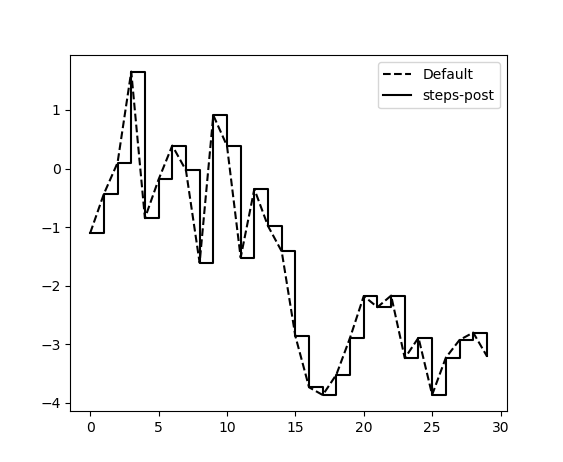

In [13]:
data = np.random.randn(30).cumsum()
plt.plot(data,'k--',label='Default')

In [14]:
plt.plot(data,'k-',drawstyle = 'steps-post',label = 'steps-post')
plt.legend(loc = 'best')   # 必须使用plt.legend来创建图例

# 刻度、标签和图例

# 设置标题、轴标签、刻度以及刻度标签

<IPython.core.display.Javascript object>


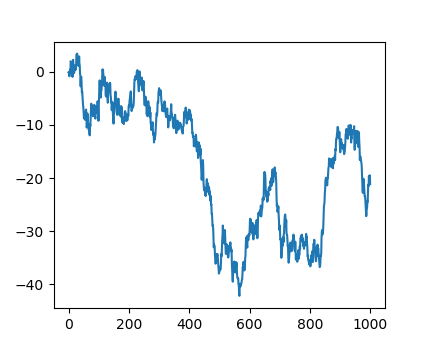

In [15]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum())

要改变x轴刻度，最简单的办法是使用set_xticks和set_xticklabels。前者告诉matplotlib要讲刻度放在数据范围中的哪些位置，默认情况下，这些位置也就是刻度标签。但我们可以通过set_xticklabels将人格其他的值用作标签：

<IPython.core.display.Javascript object>


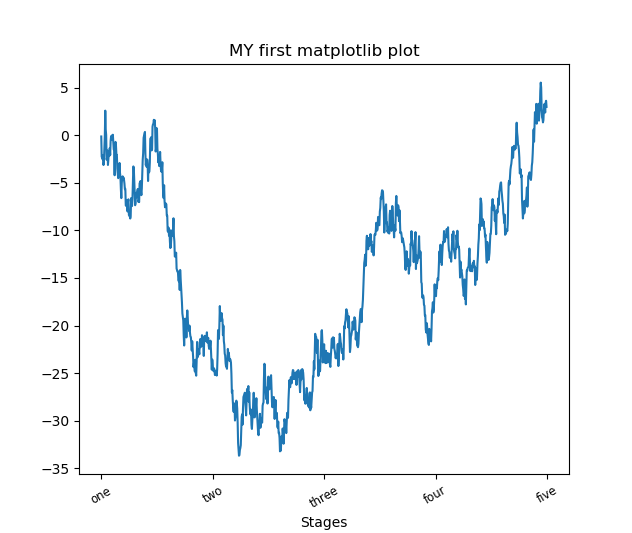

Text(0.5, 0, 'Stages')

In [26]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum())
ticks=ax.set_xticks([0,250,500,750,1000])
labels = ax.set_xticklabels(['one','two','three','four','five'],rotation = 30,
           fontsize = 'small')
ax.set_title('MY first matplotlib plot')
ax.set_xlabel('Stages')

Y轴的修改方式与此类似，将x换成y即可。轴的类有集合方法，可以批量设定绘图选项。上面的例子可以写成：           props = {
      'title':'My first matplotlib plot',
      'xlabel':'Stage'} 
ax.set(**props) 

# 添加图例

图例（legend）是另一种用于标识图标元素的重要工具。添加图例的方式有很多。最简单的是在添加subplot的时候传入label参数：

<IPython.core.display.Javascript object>


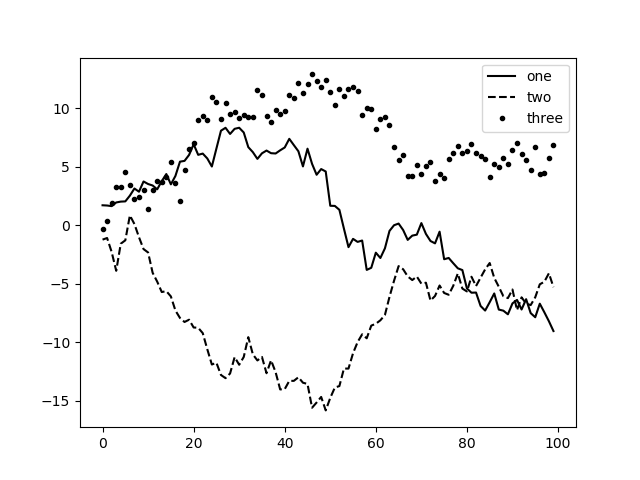

In [27]:
from numpy.random import randn
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(randn(100).cumsum(),'k',label = 'one')
ax.plot(randn(100).cumsum(),'k--',label = 'two')
ax.plot(randn(100).cumsum(),'k.',label = 'three')
ax.legend(loc = 'best')       # 调用 ax.legend（）或 plt.legend（）自动创建图例

# 注释以及在Subplot上绘图